In [449]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import datasets, preprocessing, metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from bi_functions_tobias import *

# 1) Reading and exploring data

In [3]:
df = pd.read_csv("employee_attrition.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.shape

(1470, 35)

### 1.2) Null, NaN and NA

In [9]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### 1.3) Duplicates

In [11]:
df.duplicated().sum()


0

### 1.4) Calculating outliers

In [13]:
no_outliers_15_df = calculate_outliers(df, True, False, True)


No column arguments chosen. Outliers for all columns with numerical values are calculated
Number of outliers in Age: 0
Number of outliers in DailyRate: 0
Number of outliers in DistanceFromHome: 0
Number of outliers in Education: 0
Number of outliers in EmployeeCount: 0
Number of outliers in EmployeeNumber: 0
Number of outliers in EnvironmentSatisfaction: 0
Number of outliers in HourlyRate: 0
Number of outliers in JobInvolvement: 0
Number of outliers in JobLevel: 0
Number of outliers in JobSatisfaction: 0
Number of outliers in MonthlyIncome: 114
Number of outliers in MonthlyRate: 0
Number of outliers in NumCompaniesWorked: 52
Number of outliers in PercentSalaryHike: 0
Number of outliers in PerformanceRating: 226
Number of outliers in RelationshipSatisfaction: 0
Number of outliers in StandardHours: 0
Number of outliers in StockOptionLevel: 85
Number of outliers in TotalWorkingYears: 63
Number of outliers in TrainingTimesLastYear: 238
Number of outliers in WorkLifeBalance: 0
Number of out

In [14]:
no_outliers_25_df = calculate_outliers(df, True, False, True, 2.5)

No column arguments chosen. Outliers for all columns with numerical values are calculated
Number of outliers in Age: 0
Number of outliers in DailyRate: 0
Number of outliers in DistanceFromHome: 0
Number of outliers in Education: 0
Number of outliers in EmployeeCount: 0
Number of outliers in EmployeeNumber: 0
Number of outliers in EnvironmentSatisfaction: 0
Number of outliers in HourlyRate: 0
Number of outliers in JobInvolvement: 0
Number of outliers in JobLevel: 0
Number of outliers in JobSatisfaction: 0
Number of outliers in MonthlyIncome: 0
Number of outliers in MonthlyRate: 0
Number of outliers in NumCompaniesWorked: 0
Number of outliers in PercentSalaryHike: 0
Number of outliers in PerformanceRating: 226
Number of outliers in RelationshipSatisfaction: 0
Number of outliers in StandardHours: 0
Number of outliers in StockOptionLevel: 0
Number of outliers in TotalWorkingYears: 3
Number of outliers in TrainingTimesLastYear: 65
Number of outliers in WorkLifeBalance: 0
Number of outliers 

#### 1.4.1) Investigating the outliers

##### 1.4.1.1) "PerformanceRating"

In [17]:
perf_rat = df["PerformanceRating"].value_counts()
print(perf_rat)

PerformanceRating
3    1244
4     226
Name: count, dtype: int64


##### 1.4.1.2) "TrainingTimesLastYear"

In [19]:
training_time = df["TrainingTimesLastYear"].value_counts()
print(training_time)

TrainingTimesLastYear
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: count, dtype: int64


##### 1.4.1.3) "YearsAtCompany"

In [21]:
years_at_comp = df["YearsAtCompany"].value_counts()
print(years_at_comp)

YearsAtCompany
5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: count, dtype: int64


In [22]:
no_outliers_15_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779 entries, 2 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       779 non-null    int64 
 1   Attrition                 779 non-null    object
 2   BusinessTravel            779 non-null    object
 3   DailyRate                 779 non-null    int64 
 4   Department                779 non-null    object
 5   DistanceFromHome          779 non-null    int64 
 6   Education                 779 non-null    int64 
 7   EducationField            779 non-null    object
 8   EmployeeCount             779 non-null    int64 
 9   EmployeeNumber            779 non-null    int64 
 10  EnvironmentSatisfaction   779 non-null    int64 
 11  Gender                    779 non-null    object
 12  HourlyRate                779 non-null    int64 
 13  JobInvolvement            779 non-null    int64 
 14  JobLevel                  779 

In [23]:
no_outliers_25_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1123 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1123 non-null   int64 
 1   Attrition                 1123 non-null   object
 2   BusinessTravel            1123 non-null   object
 3   DailyRate                 1123 non-null   int64 
 4   Department                1123 non-null   object
 5   DistanceFromHome          1123 non-null   int64 
 6   Education                 1123 non-null   int64 
 7   EducationField            1123 non-null   object
 8   EmployeeCount             1123 non-null   int64 
 9   EmployeeNumber            1123 non-null   int64 
 10  EnvironmentSatisfaction   1123 non-null   int64 
 11  Gender                    1123 non-null   object
 12  HourlyRate                1123 non-null   int64 
 13  JobInvolvement            1123 non-null   int64 
 14  JobLevel                  112

### 1.5) Histograms

Making histograms to investigate the data: 

1) Getting more knowledge about the distribution of the different features and thereby also about the outliers of the
features.

2) ???

In [26]:
numerical_df = df.select_dtypes(include = ['int64', 'float64'])

In [27]:
numerical_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

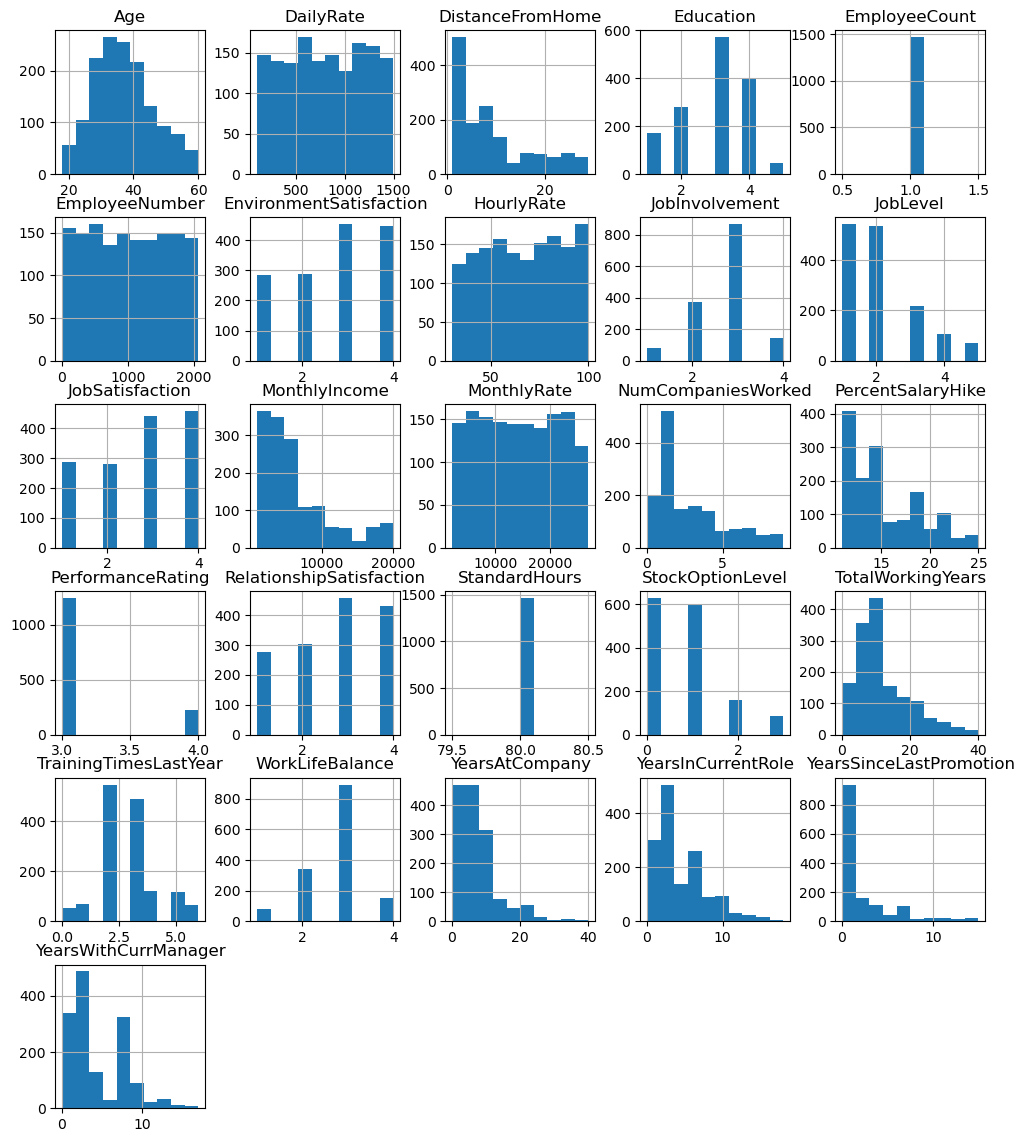

In [28]:
numerical_df.hist(bins=10, figsize=(12, 14)) 


# 2) Data Wrangling and (more) Exploration

### 2.1) One hot encoding (for correlation heat map)

In [147]:
df_encoded = pd.get_dummies(df, drop_first = True)
df_encoded = df_encoded.astype(int)

df_for_enc_limited = df.drop(columns=["EducationField", "JobRole"], inplace=False)
df_encoded_limited = pd.get_dummies(df_for_enc_limited, drop_first = True)


#### 2.2) Correlation heat map of all features except "EducationField" and "JobRole"

<function matplotlib.pyplot.show(close=None, block=None)>

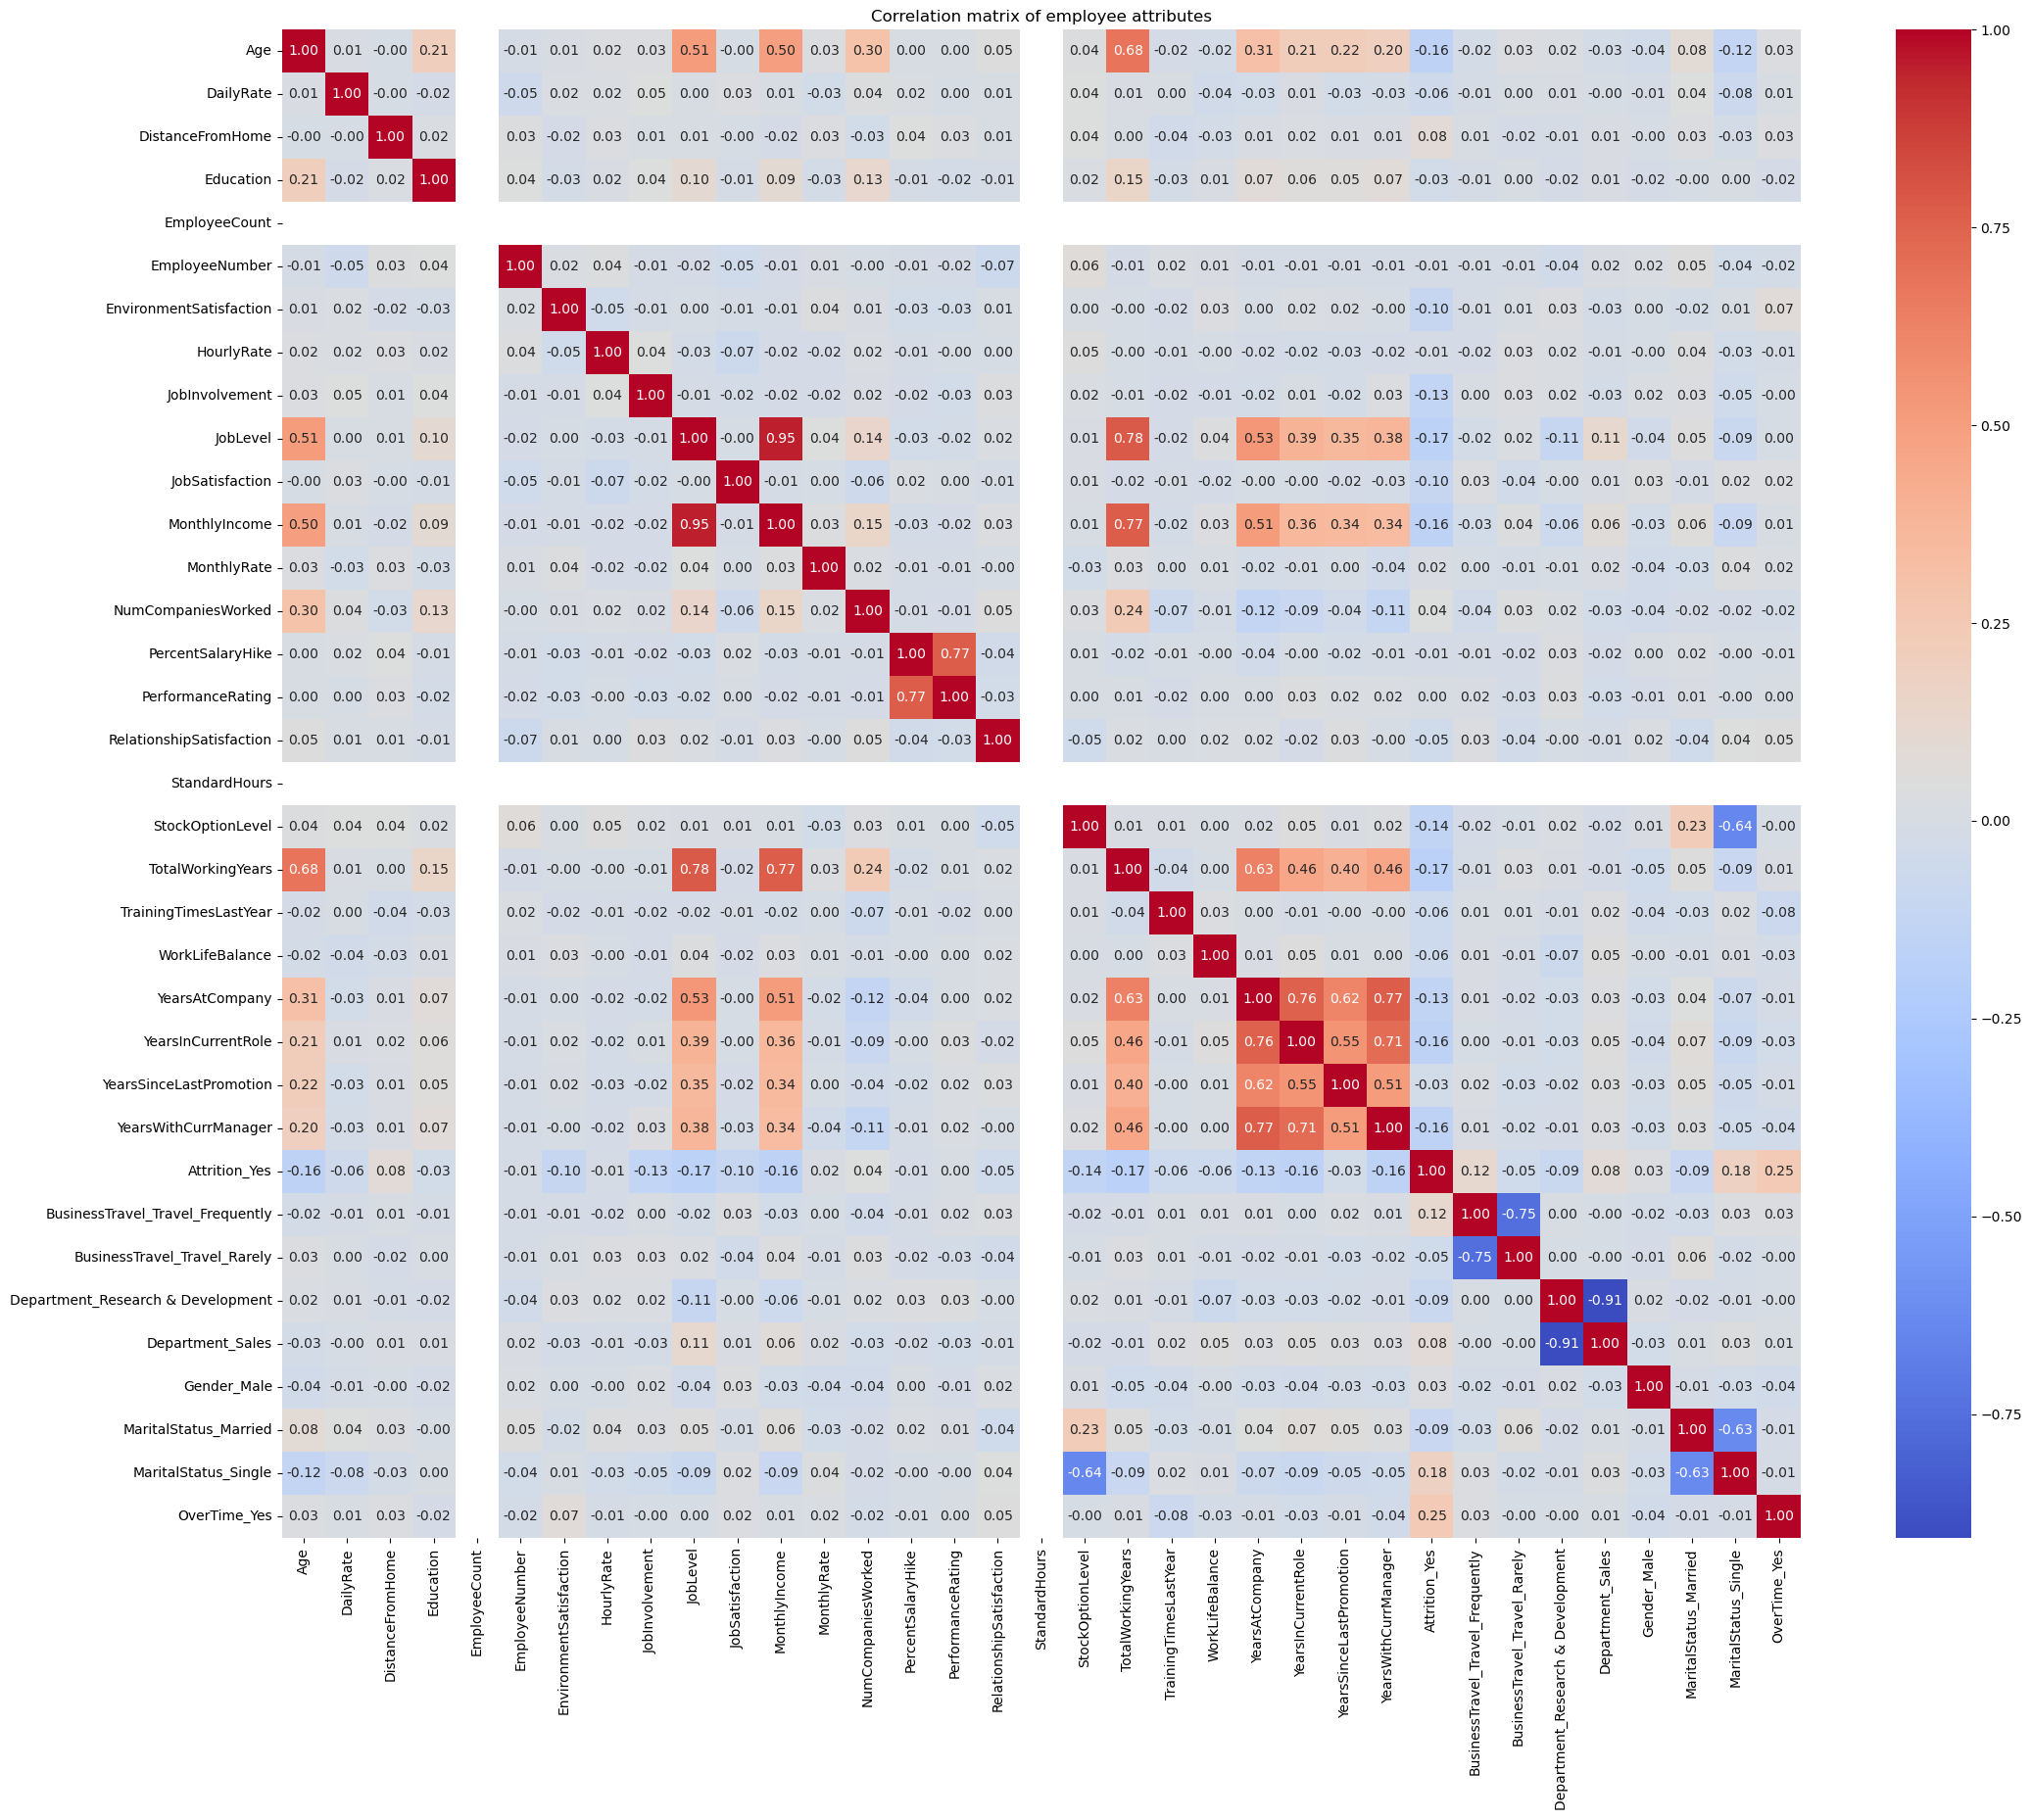

In [150]:
all_object_columns = df.select_dtypes(include=["object"]).columns.tolist()

correlation_matrix = df_encoded_limited.corr()

plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, fmt=".2f", annot=True, cmap="coolwarm")
plt.title("Correlation matrix of employee attributes")
plt.show

In [151]:
attrition_corr = correlation_matrix['Attrition_Yes'].sort_values(ascending=False)
attrition_corr

Attrition_Yes                        1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
BusinessTravel_Travel_Frequently     0.115143
Department_Sales                     0.080855
DistanceFromHome                     0.077924
NumCompaniesWorked                   0.043494
Gender_Male                          0.029453
MonthlyRate                          0.015170
PerformanceRating                    0.002889
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
Education                           -0.031373
YearsSinceLastPromotion             -0.033019
RelationshipSatisfaction            -0.045872
BusinessTravel_Travel_Rarely        -0.049538
DailyRate                           -0.056652
TrainingTimesLastYear               -0.059478
WorkLifeBalance                     -0.063939
Department_Research & Development   -0.085293
MaritalStatus_Married             

##### 2.2.1) Investigating why there is a reversed correlation of r = -91 between the "Departments" when one hot encoded

In [153]:
departments = df["Department"].value_counts()
print(departments)

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


#### 2.3) Removing highly correlated features

- "PerformanceRating" is highly correlated (r = .77) with "PercentSalaryHike"
- "YearsInCurrentRole", "YearsWithCurrentManager" are highly correlated (r = .76, r = .77)  with "YearsAtCompany"
- "MonthlyIncome", "TotalWorkingYears" are highly correlated (r = .95, r = .78)  with "JobLevel"

In [156]:
no_high_corr_df = df.drop(columns= ["PerformanceRating", "YearsInCurrentRole", "YearsWithCurrManager", "MonthlyIncome", "TotalWorkingYears"], inplace=False)


#### 2.4) Removing features with same value in all rows

In [158]:
no_corr_no_same_value_df = no_high_corr_df.drop(columns= ["EmployeeCount", "StandardHours"], inplace=False)

In [159]:
no_corr_no_same_value_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

#### 2.5) Making a data frame of all the categorical (object) columns

In [167]:
cat_df = df[all_object_columns]

In [169]:
cat_df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


#### 2.6) Making data frame with the 4 features that has the highest correlation with Attrition_Yes 

In [369]:
relevant_columns = ["Attrition_Yes", "OverTime_Yes", "MaritalStatus_Single",  "BusinessTravel_Travel_Frequently", "TotalWorkingYears"]

relevant_df = df_encoded[relevant_columns]

relevant_df.head()

,Attrition_Yes,OverTime_Yes,MaritalStatus_Single,BusinessTravel_Travel_Frequently,TotalWorkingYears
0,1,1,1,0,8
1,0,0,0,1,10
2,1,1,1,0,7
3,0,1,0,1,8
4,0,0,0,0,6


# 3) Training Models

## 3.1) Decision Tree

#### 3.1.1) Converting data to arrays

In [412]:
relevant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Attrition_Yes                     1470 non-null   int32
 1   OverTime_Yes                      1470 non-null   int32
 2   MaritalStatus_Single              1470 non-null   int32
 3   BusinessTravel_Travel_Frequently  1470 non-null   int32
 4   TotalWorkingYears                 1470 non-null   int32
dtypes: int32(5)
memory usage: 28.8 KB


In [414]:
array = relevant_df.values

# Given that the Attrition_Yes is the 20th column
X, y = array[:,1:], array[:, 0]

#### 3.1.2) Training the model

In [417]:
# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

In [419]:
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

#### 3.1.3) Training a model without eliminating any features

In [422]:
prep_df2 = pd.get_dummies(df, drop_first = True)
prep_df2 = prep_df2.astype(int)
prep_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int32
 1   DailyRate                          1470 non-null   int32
 2   DistanceFromHome                   1470 non-null   int32
 3   Education                          1470 non-null   int32
 4   EmployeeCount                      1470 non-null   int32
 5   EmployeeNumber                     1470 non-null   int32
 6   EnvironmentSatisfaction            1470 non-null   int32
 7   HourlyRate                         1470 non-null   int32
 8   JobInvolvement                     1470 non-null   int32
 9   JobLevel                           1470 non-null   int32
 10  JobSatisfaction                    1470 non-null   int32
 11  MonthlyIncome                      1470 non-null   int32
 12  MonthlyRate         

In [424]:
array2 = prep_df2.values

X2, y2 = np.delete(array2, 26, axis=1), array2[:, 26]

att_no2 = np.array(X2[y2==0])
att_yes2 = np.array(X2[y2==1])

X_train2, X_test2, y_train2, y_test2 = model_selection.train_test_split(X2, y2, test_size=0.2, random_state=10)

params2 = {'max_depth': 5}
classifier2 = DecisionTreeClassifier(**params2)
classifier2.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=5)

#### 3.1.4) Training with depth = 7

In [427]:
array3 = relevant_df.values

X3, y3 = array3[:,1:], array3[:, 0]

X_train3, X_test3, y_train3, y_test3 = model_selection.train_test_split(X3, y3, test_size=0.2, random_state=7)

params3 = {'max_depth': 7}
classifier3 = DecisionTreeClassifier(**params3)
classifier3.fit(X_train3, y_train3)

DecisionTreeClassifier(max_depth=7)

## 3.2) Naive Bayes Model

In [437]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# 4) Testing the model

In [391]:

y_testp = classifier.predict(X_test)

y_testp2 = classifier2.predict(X_test2)

y_testp3 = classifier3.predict(X_test3)



### 4.1) Accuracy Score of Decision Trees

##### 4.1.1) Depth = 5

In [395]:
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.8401360544217688


##### 4.1.2) Depth = 7

In [398]:
print ("Accuracy is ", accuracy_score(y_test3, y_testp3))

Accuracy is  0.8367346938775511


##### 4.1.3) All features, depth = 5

In [401]:
print ("Accuracy is ", accuracy_score(y_test2, y_testp2))

Accuracy is  0.8333333333333334


### 4.2) Confusion table

In [404]:
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat


array([[243,   8],
       [ 39,   4]], dtype=int64)

Text(0.5, 0, 'Predicted labels')

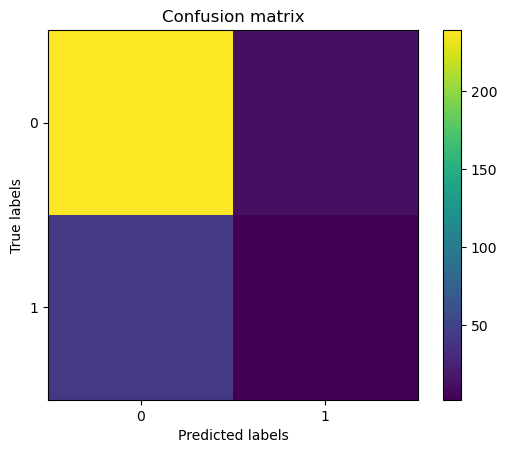

In [367]:

plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(2)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

### 4.3) Model score of Naive Bayes Models

In [444]:
model.score(X_test, y_test)

0.8537414965986394

### 4.4) Confusion Matric of Naive Bayes Models

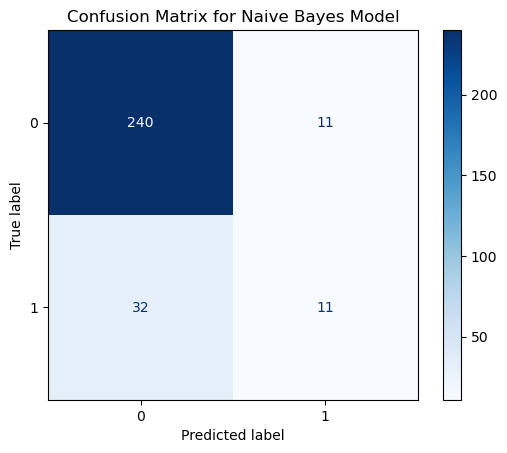

In [451]:
bayes_y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, bayes_y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Naive Bayes Model")
plt.show()


# RANDOM FOREST

In [469]:
classifier4 = RandomForestClassifier(n_estimators = 100, max_depth = 2)
classifier4.fit(X_train, y_train)
random_forest_y_pred = classifier4.predict(X_test)
accuracy_score(y_test, random_forest_y_pred)

0.8605442176870748

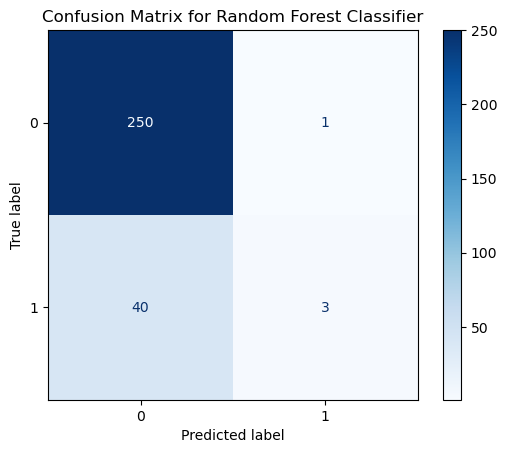

In [471]:
conf_matrix = confusion_matrix(y_test, random_forest_y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classifier4.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()